In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Bidirectional, SimpleRNN,Dropout , Flatten,LSTM
from keras.utils import np_utils
import keras.layers as KL
from keras import initializers
from keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns
from sklearn import decomposition
from sklearn.manifold import TSNE
%matplotlib inline

# Loading dataset

In [ ]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**about the mnist datase**

The mnist dataset contains 60,000 for training and 10000 for test different 28 * 28 images of hand written numerical characters from 0–9

In [ ]:
#convert ytrain(labels) for pandas.ser
y_train = ytrain
ytrain= pd.Series(ytrain)

# visualiztion

**Bar Chart :** to show adistribution of data points in mnist dataset


1.   The class of digit 1 is the biggest class  
2.   The class of digit 5 is the smallest one






[6742 6265 6131 5958 5949 5923 5918 5851 5842 5421]
UInt64Index([1, 7, 3, 2, 9, 0, 6, 8, 4, 5], dtype='uint64')


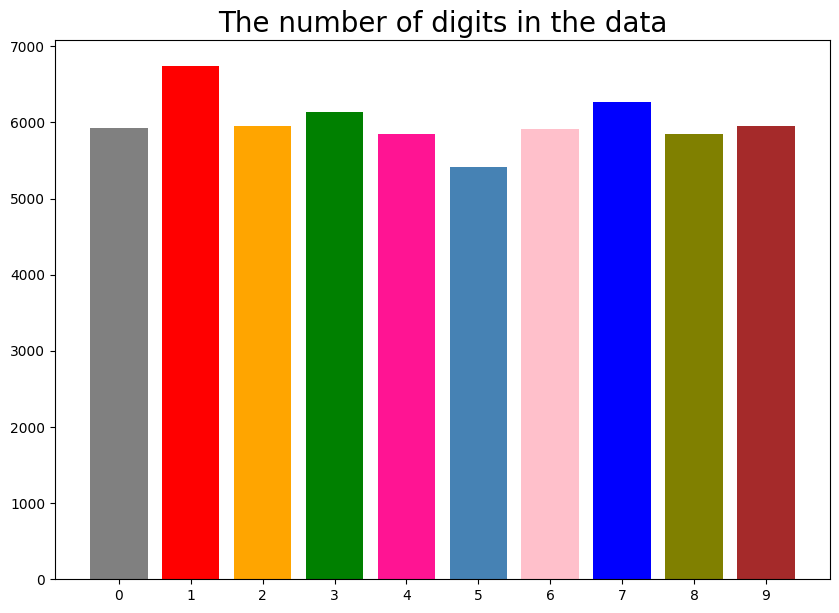

In [ ]:
val = ytrain.value_counts().index
cnt = ytrain.value_counts().values
print(cnt)
print(val)
mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']

plt.figure(figsize = (10, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt, color = mycolors);

**Pie chart**

*   to show the percentage of each class according to whole training dataset





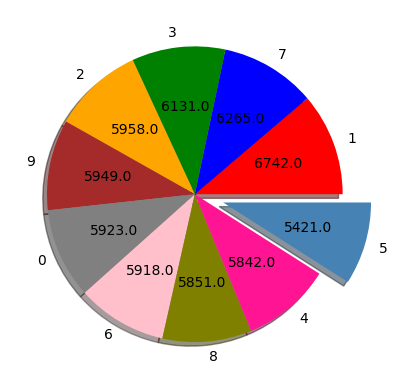

In [ ]:
mylabels = [1, 7, 3, 2, 9, 0, 6, 8, 4, 5]
myexplode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']
def absolute_value(val):
    a  = np.round(val/100.*cnt.sum(), 0)
    return a
plt.pie(cnt, labels = mylabels,explode = myexplode, shadow = True,colors = mycolors,autopct = absolute_value)
#plt.legend(title = "mnist digit",loc='lower right')
plt.show()

In [ ]:
Xtrain_pd=Xtrain.reshape(60000,28*28)
Xtrain_pd.shape

(60000, 784)

In [ ]:
col =[]
for i in range(784):
  col.append('pixel'+str(i))
#col

In [ ]:
df = pd.DataFrame(Xtrain_pd, columns =col)

In [ ]:
df


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ytrain

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8

In [ ]:
df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


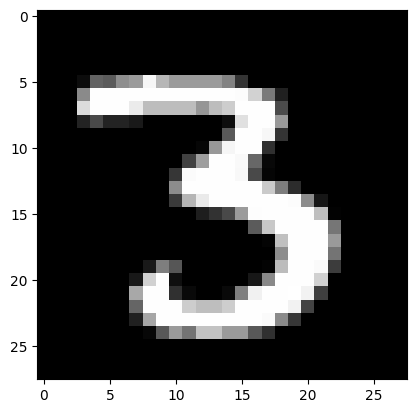

<Figure size 1500x700 with 0 Axes>

The above digit is 3


In [ ]:
idx=12

#converting the data point with index as idx into a numpy array of size 28 * 28
grid_data = df.iloc[idx].values.reshape(28,28)

plt.imshow(grid_data, interpolation ='none',cmap='gray')
plt.figure(figsize = (15, 7))
plt.show()
print('The above digit is ' + str(ytrain[idx]))

 **2D visualization using PCA**

In [ ]:
pca_data=df
# data pre-processing : Standardizing the data i.e. mean=0 and varaince= 1
#Note: pca_data has been converteed to float type before apply standardization using the funtion 'astype()'
std_data= StandardScaler().fit_transform(pca_data.astype(float))
print(std_data.shape)

(60000, 784)


In [ ]:
# finding the covariance matrix : S = (1/n)* A.T*A
cov_mat=(np.matmul(std_data.T, std_data))/std_data.shape[0]
print('The shape of covariance matrix is ',cov_mat.shape)

The shape of covariance matrix is  (784, 784)


In [ ]:
#finding the top two eigen values and corrsponding eigen vectors

# the parameter 'eigvals' is defined (low value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors= eigh(cov_mat, eigvals=(782,783))

print('Shape of the vectors', vectors.shape)

Shape of the vectors (784, 2)


<ipython-input-15-5a3cfbc3111f>:6: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors= eigh(cov_mat, eigvals=(782,783))


In [ ]:
#since vector[0] is 2nd principal and vectors[1] is 1st principal ,therefore we need to reverse the vectors and
# take there traspose
vectors= vectors.T
vectors=vectors[::-1]
print('updated shape of the vectors', vectors.shape)

updated shape of the vectors (2, 784)


In [ ]:
#projecting the original data on the new plane formed by the two eigen vectors
new_coordinates= np.matmul(vectors,std_data.T)
print(new_coordinates.shape)

(2, 60000)


In [ ]:
new_coordinates=np.vstack((new_coordinates,ytrain)).T
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st principal", "2nd principal", "label"))
print(dataframe.head())

   1st principal  2nd principal  label
0      -0.922159      -4.814790    5.0
1       8.708977      -7.754403    0.0
2       2.328389       9.431338    4.0
3      -6.582173      -3.746318    1.0
4      -5.183251       3.133297    9.0


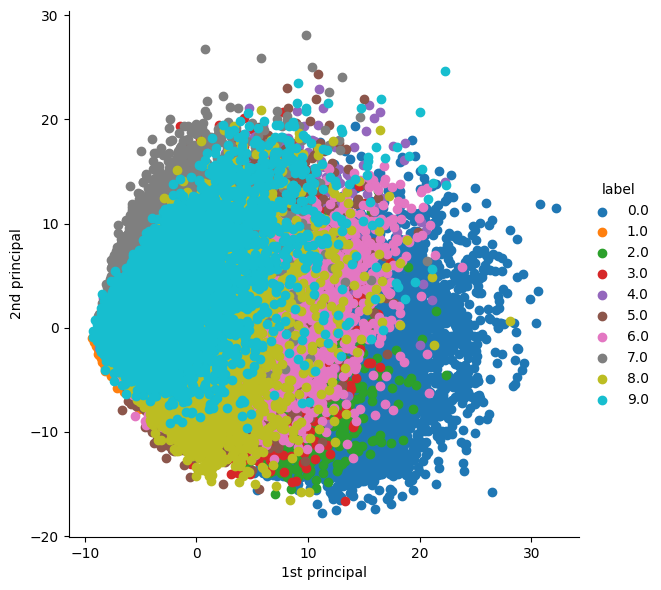

In [ ]:
sns.FacetGrid(dataframe, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

**PCA using Scikit-learn**

In [ ]:
pca= decomposition.PCA()
# the only parameter required to specify is the number of dimentions to which we want the data to be reduced to
pca.n_components = 2
p_data= pca.fit_transform(std_data)
print(p_data.shape)

(60000, 2)


In [ ]:
# attaching the labels to p_data
p_data=np.vstack((p_data.T,ytrain)).T
print(p_data.shape)

(60000, 3)


In [ ]:
# creating a new dataFrame for plotting purpose
pca_df = pd.DataFrame(data=p_data, columns=("1st principal", "2nd principal", "label"))
print(dataframe.head())

   1st principal  2nd principal  label
0      -0.922159      -4.814790    5.0
1       8.708977      -7.754403    0.0
2       2.328389       9.431338    4.0
3      -6.582173      -3.746318    1.0
4      -5.183251       3.133297    9.0


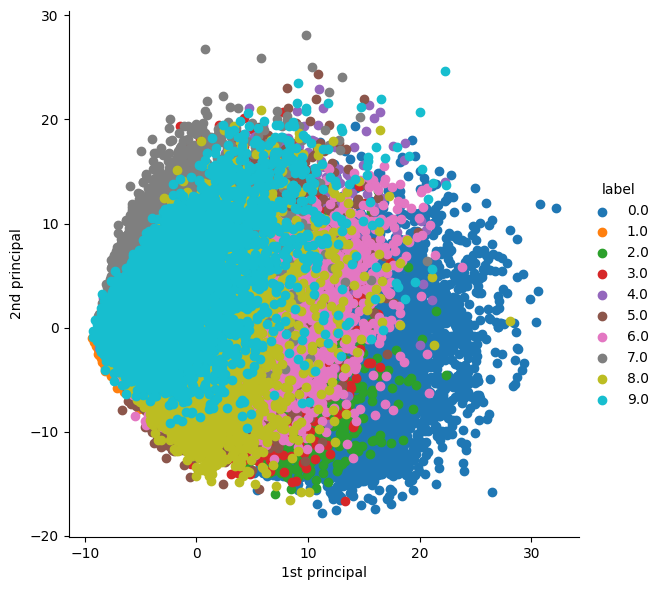

In [ ]:
sns.FacetGrid(pca_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

# t-SNE using scikit-learn :
for visualizing high-dimential  mnist data (784 dimensions) dy giving each datapoint a location in two-dimensional

In [ ]:
#model with perplexity = 50
# and iterations =4000
model = TSNE(n_components=2, random_state=0, perplexity= 50, n_iter=4000)
tsne_data_all = model.fit_transform(std_data)

In [ ]:
#creating a new data frame which help us in ploting the result data
tsne_data_all = np.vstack((tsne_data_all.T, ytrain)).T
tsne_df_all = pd.DataFrame(data=tsne_data_all, columns=("Dim_1", "Dim_2", "label"))

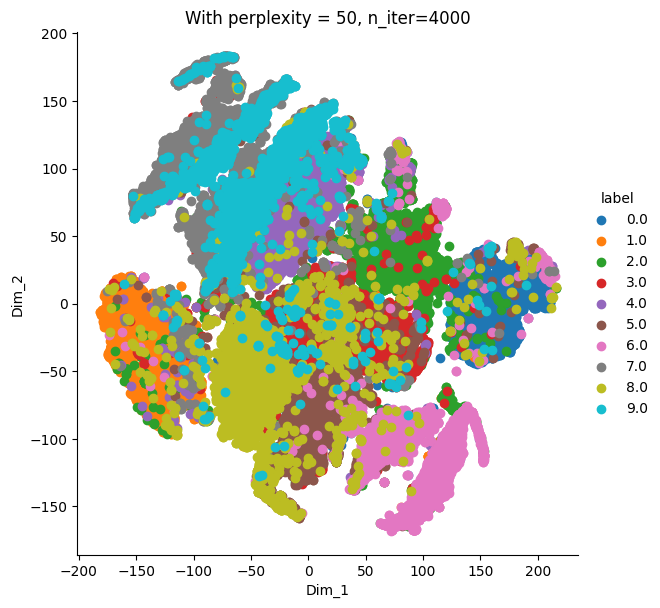

In [ ]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df_all, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=4000')
plt.show()

**Picking the top 1000 points**
to visualize each class clearly

In [ ]:
data_1000 = std_data[0:1000,:]
labels_1000 =ytrain[0:1000]

In [ ]:
#model with perplexity = 50
# and iterations =4000
model = TSNE(n_components=2, random_state=0, perplexity= 50, n_iter=4000)
tsne_data = model.fit_transform(data_1000)

In [ ]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

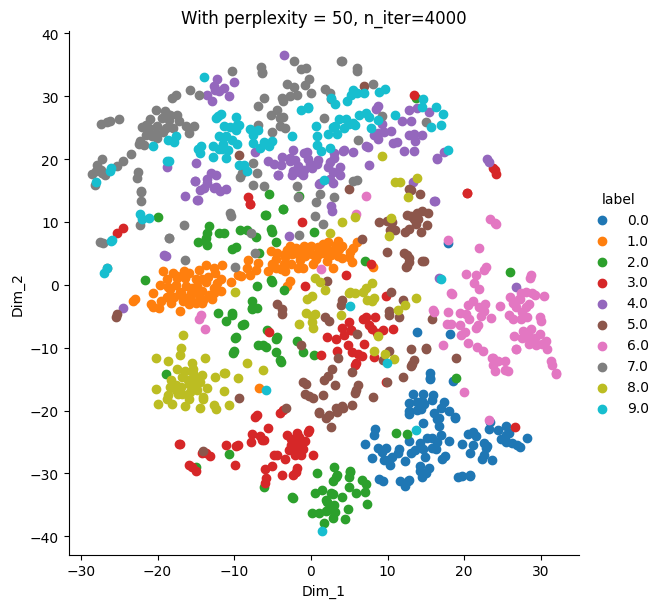

In [ ]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=4000')
plt.show()

**each class emdbeddings**
if observed , the classe 2,3 have some tough time while others are pretty good espcially (0,1)

In [ ]:
def get_class_tsne_data_arrays(class_index):
    y_train2 = y_train[:1000]
    return tsne_data[y_train2==class_index],y_train2[y_train2==class_index]

<ipython-input-79-e314edd14268>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("jet", 10), marker='.')


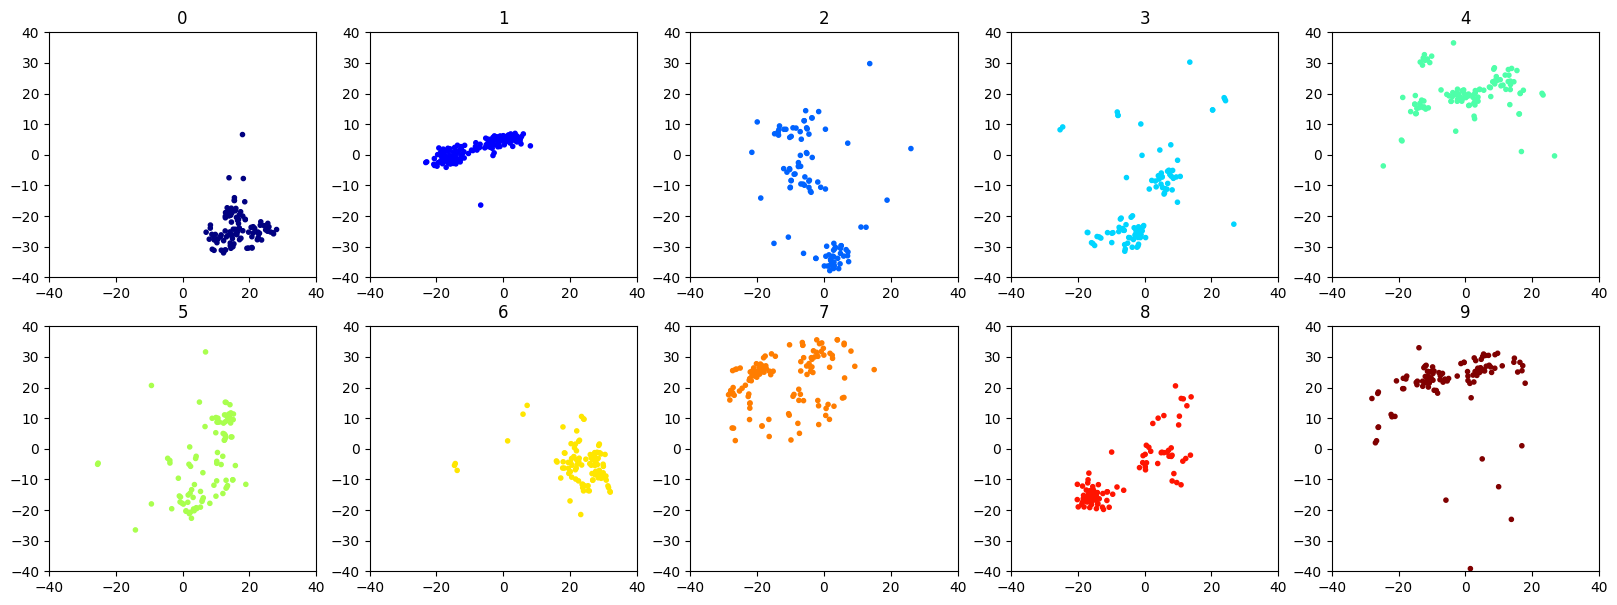

In [ ]:
figure = plt.figure(figsize=(20,7))

for i in range(10):
    plt.subplot(2,5,i+1)
    class_embeddings_arrayX,class_embeddings_arrayY = get_class_tsne_data_arrays(i)
    plt.scatter(class_embeddings_arrayX[:, 0], class_embeddings_arrayX[:, 1], c=class_embeddings_arrayY,
                cmap=plt.cm.get_cmap("jet", 10), marker='.')
    plt.clim(-0.5, 9.5)
    plt.axis([-40, 40, -40, 40])
    plt.title(i)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 138 238 217  68   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 150 254 254 254 232   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  63 224 254 145 254 240  22   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  15 160 253 254 254 187 254 18

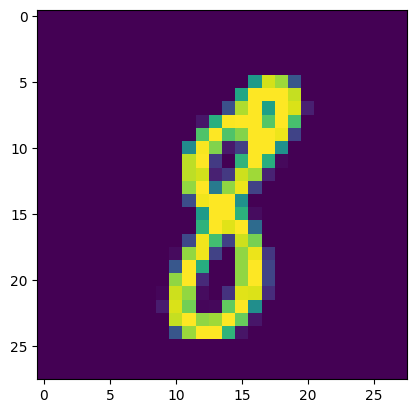

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=280)
print(Xtrain[300])
plt.imshow(Xtrain[300])

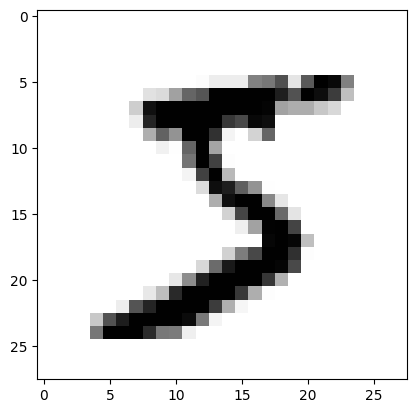

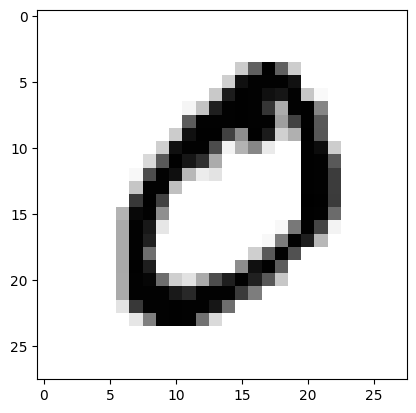

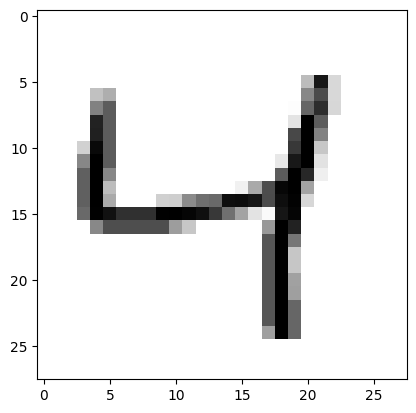

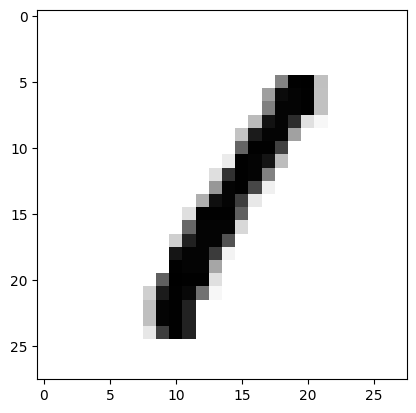

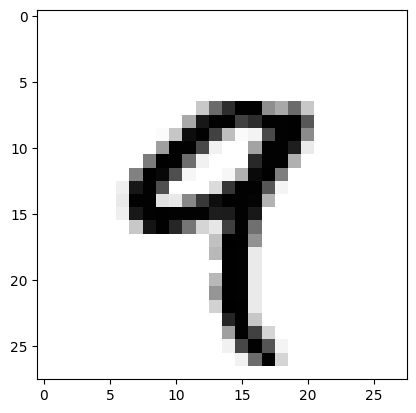

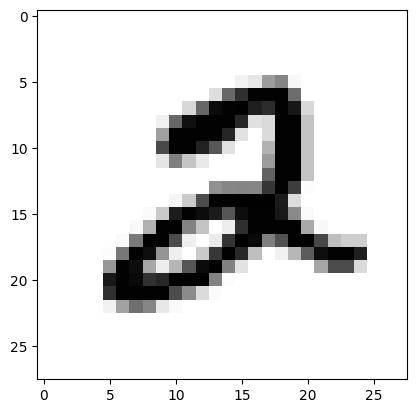

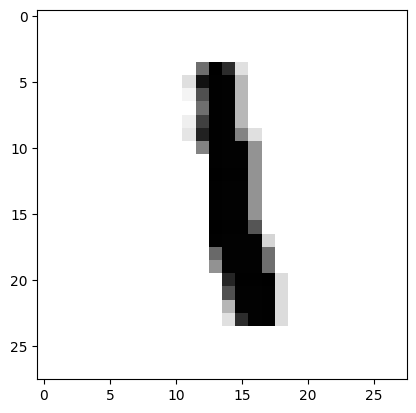

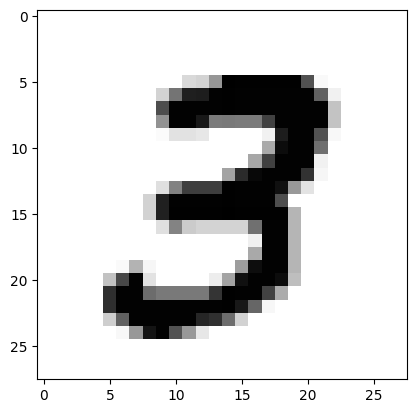

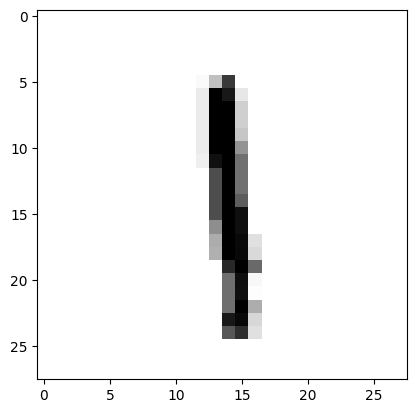

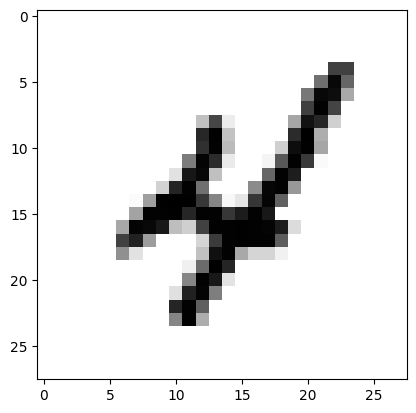

In [ ]:
for i in range(10):
    plt.imshow(Xtrain[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# DNN

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [ ]:
print('train: ', xtrain.shape)
print('Test: ', xtest.shape)

train:  (60000, 28, 28)
Test:  (10000, 28, 28)


In [ ]:
xtrain, xtest = xtrain / 255, xtest / 255

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [ ]:
history = model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 0.2211 - accuracy: 0.9365
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.9725
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9811
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9861
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

Text(0, 0.5, 'loss')

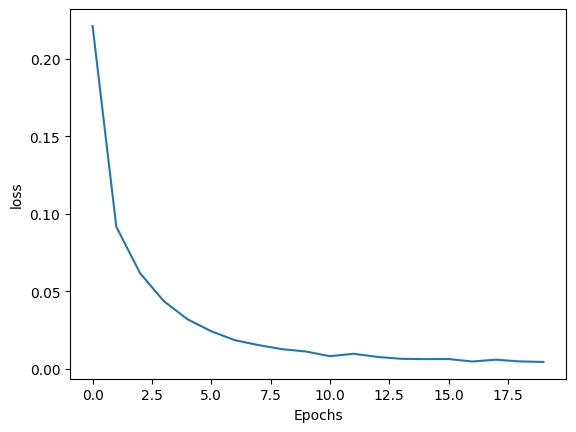

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

In [ ]:
DNN = model.evaluate(xtest,ytest)
print(DNN)

313/313 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.9817
[0.09817185252904892, 0.9817000031471252]


# CNN

In [ ]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
input_shape = (28, 28, 1)
Xtrain = Xtrain.reshape(Xtrain.shape[0],28, 28, 1)
Xtest = Xtest.reshape(Xtest.shape[0],28,28,1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
Xtrain, Xtest = Xtrain / 255, Xtest / 255

In [ ]:
ytrain = tf.keras.utils.to_categorical(ytrain,10)
ytest = tf.keras.utils.to_categorical(ytest,10)

In [ ]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation=tf.nn.relu,
                                  input_shape=input_shape),
        tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu ),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history_cnn = model2.fit(Xtrain,ytrain,
           batch_size=128,
           epochs=10,
           validation_data=(Xtest,ytest))

Epoch 1/10
469/469 [==============================] - 14s 11ms/step - loss: 0.2288 - accuracy: 0.9302 - val_loss: 0.0476 - val_accuracy: 0.9843
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0836 - accuracy: 0.9755 - val_loss: 0.0354 - val_accuracy: 0.9884
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0284 - val_accuracy: 0.9908
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0273 - val_accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0288 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0280 - val_accuracy: 0.990

In [ ]:
cnn = model2.evaluate(Xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9922


In [ ]:
print(cnn)

[0.02551223523914814, 0.9918000102043152]


Text(0, 0.5, 'loss')

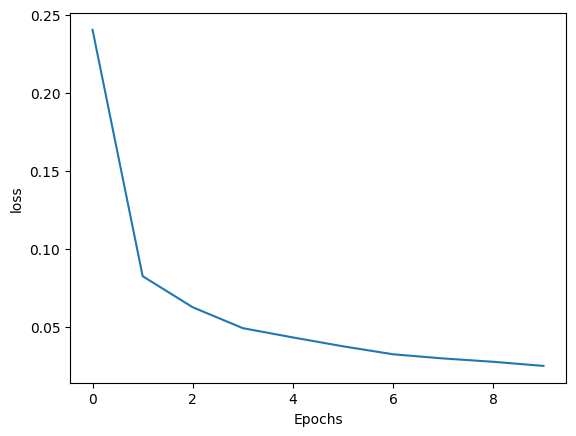

In [ ]:
plt.plot(history_cnn.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

# Simple RNN

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
num_labels = len(np.unique(y_train))

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#  parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
model = Sequential(name='SimpleRNN_MNIST')
model.add(SimpleRNN(units=units,
                    input_shape=input_shape))
model.add(Dense(num_labels, activation='softmax'))
model.summary()

Model: "SimpleRNN_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history_SimpleRNN =model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 11s 21ms/step - loss: 0.4223 - accuracy: 0.8701
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1956 - accuracy: 0.9407
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1533 - accuracy: 0.9542
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1253 - accuracy: 0.9625
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1151 - accuracy: 0.9663
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1040 - accuracy: 0.9691
Epoch 7/20
469/469 [==============================] - 15s 31ms/step - loss: 0.0961 - accuracy: 0.9715
Epoch 8/20
469/469 [==============================] - 18s 39ms/step - loss: 0.0896 - accuracy: 0.9736
Epoch 9/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0850 - accuracy: 0.9749
Epoch 10/20
469/469 [==============================] - 15s 33ms/step - loss: 0.0846

In [ ]:
simpleRNN = model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 1s 5ms/step - loss: 0.0838 - accuracy: 0.9758


Text(0, 0.5, 'loss')

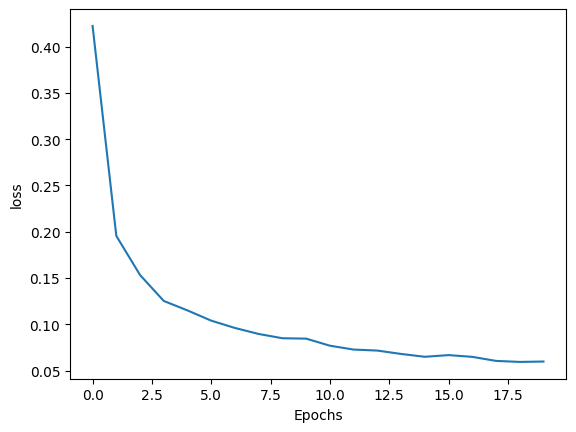

In [ ]:
plt.plot(history_SimpleRNN.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

# LSTM

In [ ]:
# Hyper parameters
batch_size = 128
nb_epoch = 50

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28
nb_classes = 10

# Parameters for LSTM network
nb_lstm_outputs = 30
nb_time_steps = img_rows
dim_input_vector = img_cols

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)

X_train original shape: (60000, 28, 28)


In [ ]:
input_shape = (nb_time_steps, dim_input_vector)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(LSTM(nb_lstm_outputs, input_shape=input_shape))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                7080      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 7,390
Trainable params: 7,390
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/50
469/469 [==============================] - 6s 5ms/step - loss: 1.1862 - accuracy: 0.6125
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4428 - accuracy: 0.8699
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2767 - accuracy: 0.9187
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2109 - accuracy: 0.9389
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1745 - accuracy: 0.9489
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1486 - accuracy: 0.9563
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1311 - accuracy: 0.9611
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1189 - accuracy: 0.9644
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1088 - accuracy: 0.9677
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1008 - accuracy: 0.9702

In [ ]:
lstm = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (lstm[0], lstm[1]))

79/79 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9810
Summary: Loss over the test dataset: 0.07, Accuracy: 0.98


# LSTM with Adam

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)

X_train original shape: (60000, 28, 28)


In [ ]:
input_shape = (nb_time_steps, dim_input_vector)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(LSTM(nb_lstm_outputs, input_shape=input_shape))
model.add(Dense(128,activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30)                7080      
                                                                 
 dense_6 (Dense)             (None, 128)               3968      
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 12,338
Trainable params: 12,338
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/50
469/469 [==============================] - 5s 7ms/step - loss: 0.9142 - accuracy: 0.6963
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2749 - accuracy: 0.9151
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1883 - accuracy: 0.9427
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1529 - accuracy: 0.9526
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1295 - accuracy: 0.9611
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1139 - accuracy: 0.9646
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1001 - accuracy: 0.9698
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0967 - accuracy: 0.9706
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0871 - accuracy: 0.9729
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0821 - accuracy: 0.9749

In [ ]:
lstm2 = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (lstm2[0], lstm2[1]))

79/79 [==============================] - 1s 4ms/step - loss: 0.0651 - accuracy: 0.9834
Summary: Loss over the test dataset: 0.07, Accuracy: 0.98


# 3 layers Lstm with rmsprop optimizer

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# Hyper parameters
batch_size = 128
nb_epoch = 50
## Model
inputs = KL.Input((28,28))
x=KL.LSTM(30,return_sequences='true')(inputs)
d= KL.Dropout(0.25)(x)
xx =KL.LSTM(30,return_sequences='true')(d)
dd=KL.Dropout(0.5)(xx)
xxx=KL.LSTM(64)(dd)
ddd=KL.Dropout(0.25)(xxx)
xxxx=KL.Dense(128,activation=tf.nn.relu)(ddd)
dddd=KL.Dropout(.25)(xxxx)
outputs = KL.Dense(10, activation="softmax")(xxxx)
model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 28, 30)            7080      
                                                                 
 dropout (Dropout)           (None, 28, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 28, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 28, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                24320     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

In [ ]:
model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["acc"])

In [ ]:
history_lstm=model.fit(x_train, y_train, epochs=50, batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 52s 98ms/step - loss: 0.9322 - acc: 0.6774 - val_loss: 0.4134 - val_acc: 0.8613
Epoch 2/50
469/469 [==============================] - 44s 93ms/step - loss: 0.3574 - acc: 0.8880 - val_loss: 0.2057 - val_acc: 0.9356
Epoch 3/50
469/469 [==============================] - 44s 94ms/step - loss: 0.2209 - acc: 0.9323 - val_loss: 0.1540 - val_acc: 0.9514
Epoch 4/50
469/469 [==============================] - 46s 98ms/step - loss: 0.1639 - acc: 0.9507 - val_loss: 0.1324 - val_acc: 0.9581
Epoch 5/50
469/469 [==============================] - 43s 92ms/step - loss: 0.1307 - acc: 0.9609 - val_loss: 0.0942 - val_acc: 0.9710
Epoch 6/50
469/469 [==============================] - 44s 93ms/step - loss: 0.1129 - acc: 0.9659 - val_loss: 0.0872 - val_acc: 0.9734
Epoch 7/50
469/469 [==============================] - 43s 91ms/step - loss: 0.1020 - acc: 0.9694 - val_loss: 0.0690 - val_acc: 0.9799
Epoch 8/50
469/469 [==============================] - 43s 91ms

In [ ]:
lstm_3 = model.evaluate(x_test, y_test)
print("Loss: {0} - Acc: {1}".format(lstm_3[0], lstm_3[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.0418 - acc: 0.9907
Loss: 0.04182010516524315 - Acc: 0.9907000064849854


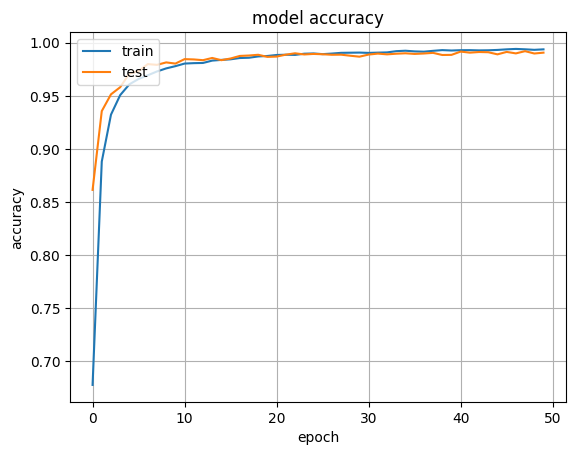

In [ ]:
plt.plot(history_lstm.history['acc'])
plt.plot(history_lstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

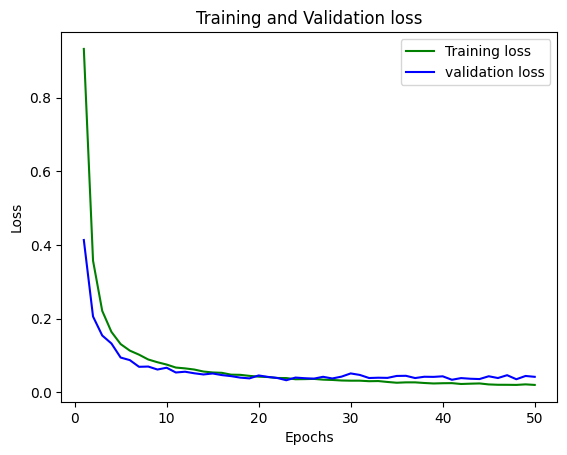

In [ ]:
loss_train = history_lstm.history['loss']
loss_val = history_lstm.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# visualize acc and loss for each algorithm

In [ ]:
simpleRNN=[0.0838,0.9758]
DNN=[0.09817185252904892, 0.9817000031471252]
cnn=[0.02551223523914814, 0.9918000102043152]

In [ ]:
algo ={'cnn':cnn,'rnn':simpleRNN,'DNN':DNN,'LSTM':lstm_3}
loss = [round(cnn[0],3),round(simpleRNN[0],3),round(DNN[0],3),round(lstm_3[0],3)]
name = [key for key in algo]
acc = [round(cnn[1],3),round(simpleRNN[1],3),round(DNN[1],3),round(lstm_3[1],3)]

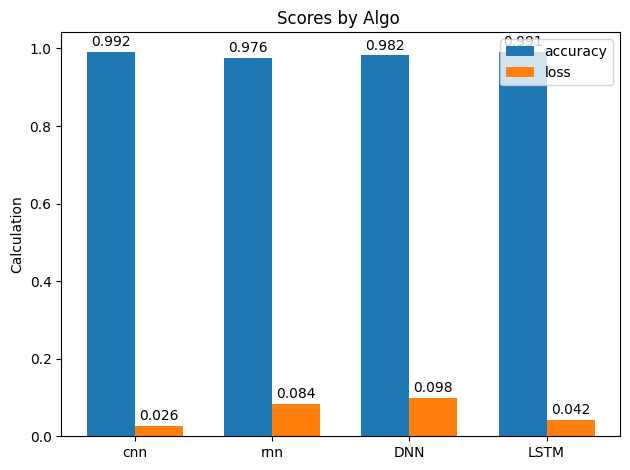

<Figure size 8000x4000 with 0 Axes>

In [ ]:
labels = name
accuracy = acc
loss = loss

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
rects2 = ax.bar(x + width/2, loss, width, label='loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Calculation')
ax.set_title('Scores by Algo ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.figure(figsize = (80, 40))
plt.show()

# prediction using 3layers LSTM

In [ ]:
predictions=model.predict(x_test[0:300])

10/10 [==============================] - 1s 13ms/step


In [ ]:
predictions[0]

array([1.50202212e-10, 1.99721072e-07, 2.56028692e-08, 8.33987741e-08,
       5.24052552e-07, 1.13803267e-09, 1.25800785e-11, 9.99998868e-01,
       6.21590723e-10, 1.08889992e-07], dtype=float32)

In [ ]:
np.argmax(predictions[1])

2

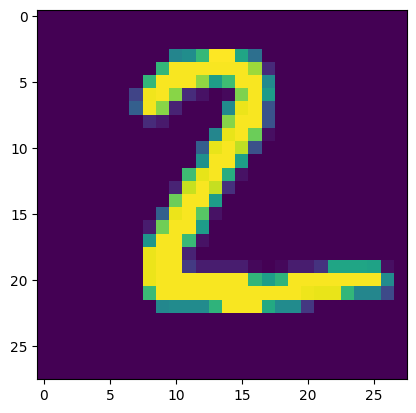

In [ ]:
plt.imshow(x_test[1].reshape(28,28))

In [ ]:
np.argmax(predictions,axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8])

In [ ]:
y_test[0:300]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8], d

In [ ]:
np.argmax(predictions,axis=1) ==y_test[0:300]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
np.mean(np.argmax(predictions,axis=1) ==y_test[0:300])

0.99

In [ ]:
wrong = np.argmin(np.argmax(predictions,axis=1) == y_test[0:300])
print(wrong)

18


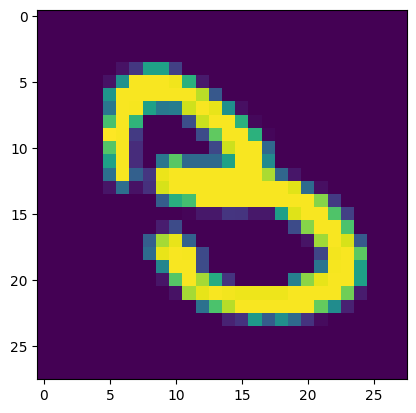

label for  18 : 3
prediction for it :  8


In [ ]:
plt.imshow(x_test[wrong].reshape(28,28))
plt.show()
print("label for ",wrong,":",y_test[wrong])
print("prediction for it : ",np.argmax(predictions[wrong]))

In [ ]:
predictions_all=model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


**confusion_matrix**

*   the pairwise digits with the highest confusion  is (3,5)
*   a subset with low confusion (0-1)
*   the class label (5) with the highest count of misclassification samples

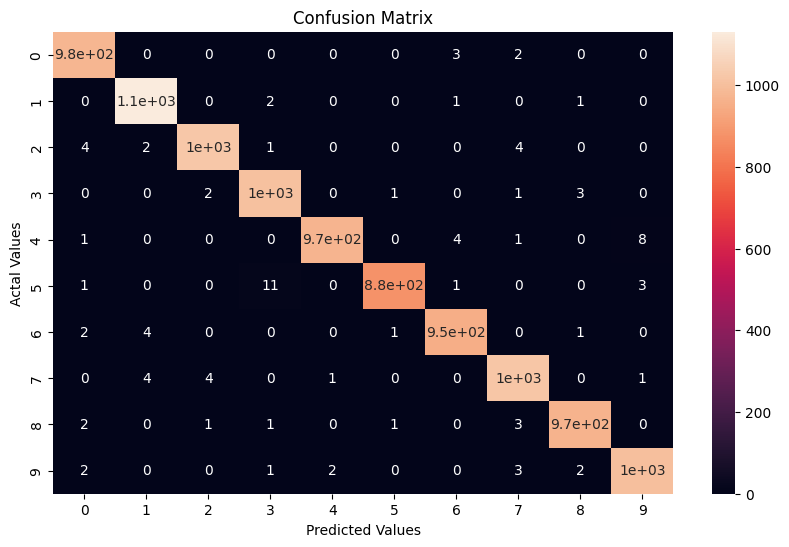

In [ ]:
from sklearn import metrics
import pandas as pd
confusion_matrix = metrics.confusion_matrix(y_test, np.argmax(predictions_all,axis=1))

cm_df = pd.DataFrame(confusion_matrix ,
                     index = ['0','1','2','3','4','5','6','7','8','9'],
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()